In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import os

%matplotlib inline

In [2]:
def rot90(x):
    d = x.max()
    n = copy.deepcopy(x)
    n = n[:,::-1]
    n[:,1] = d - n[:,1]
    n = n[::-1]
    return n

def rot180(x):
    return rot90(rot90(x))

def rot270(x):
    d = x.max()
    n = copy.deepcopy(x)
    n = n[:,::-1]
    n[:,0] = d - n[:,0]
    n = n[::-1]
    return n

def change_start(x):
    return np.vstack([x[-5*x.shape[0]//8::], x[:-5*x.shape[0]//8]])

In [3]:
deflection = np.array([[1,0], [0,1], [1,2], [2,1]])
start = np.array([[0,0], [1,0], [1,1], [0,1]])

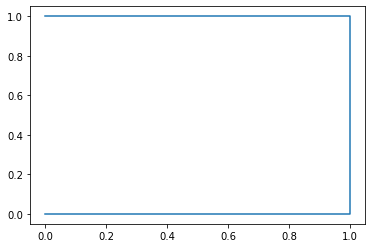

In [4]:
plt.plot([p[0] for p in start], [p[1] for p in start])

In [5]:
itrs = 8
points = np.array([[0,0], [1,0], [1,1], [0,1]])
d = points.max()+1

for i in range(itrs-1):
    p1 = copy.deepcopy(points)
    p2 = copy.deepcopy(points)
    p3 = copy.deepcopy(points)
    p4 = copy.deepcopy(points)

    p1 = rot90(p1)
    p2 = p2[::-1]
    p2 = rot180(p2)
    p3 = rot270(p3)
    p4 = p4[::-1]

    p1 = deflection[0]*(2**i)*d + p1
    p2 = deflection[1]*(2**i)*d + p2
    p3 = deflection[2]*(2**i)*d + p3
    p4 = deflection[3]*(2**i)*d + p4

    # if i == 0:
    p1 = np.vstack((p1, np.array([p2[0,0], p1[-1,1]])))
    p2 = np.vstack((p2, np.array([p2[-1,0], p3[0,1]])))
    p3 = np.vstack((p3, np.array([p4[0,0], p3[-1,1]])))
    p4 = np.vstack((p4, np.array([p4[-1,0], p1[0,1]])))

    points = np.vstack((p1,p2,p3,p4))
    # if i == 0:
    points = change_start(points)
    points = points[::-1]

In [6]:
def plotting_points(points):
    x = [p[0] for p in points]
    x.append(points[0][0])
    y = [p[1] for p in points]
    y.append(points[0][1])
    return x,y

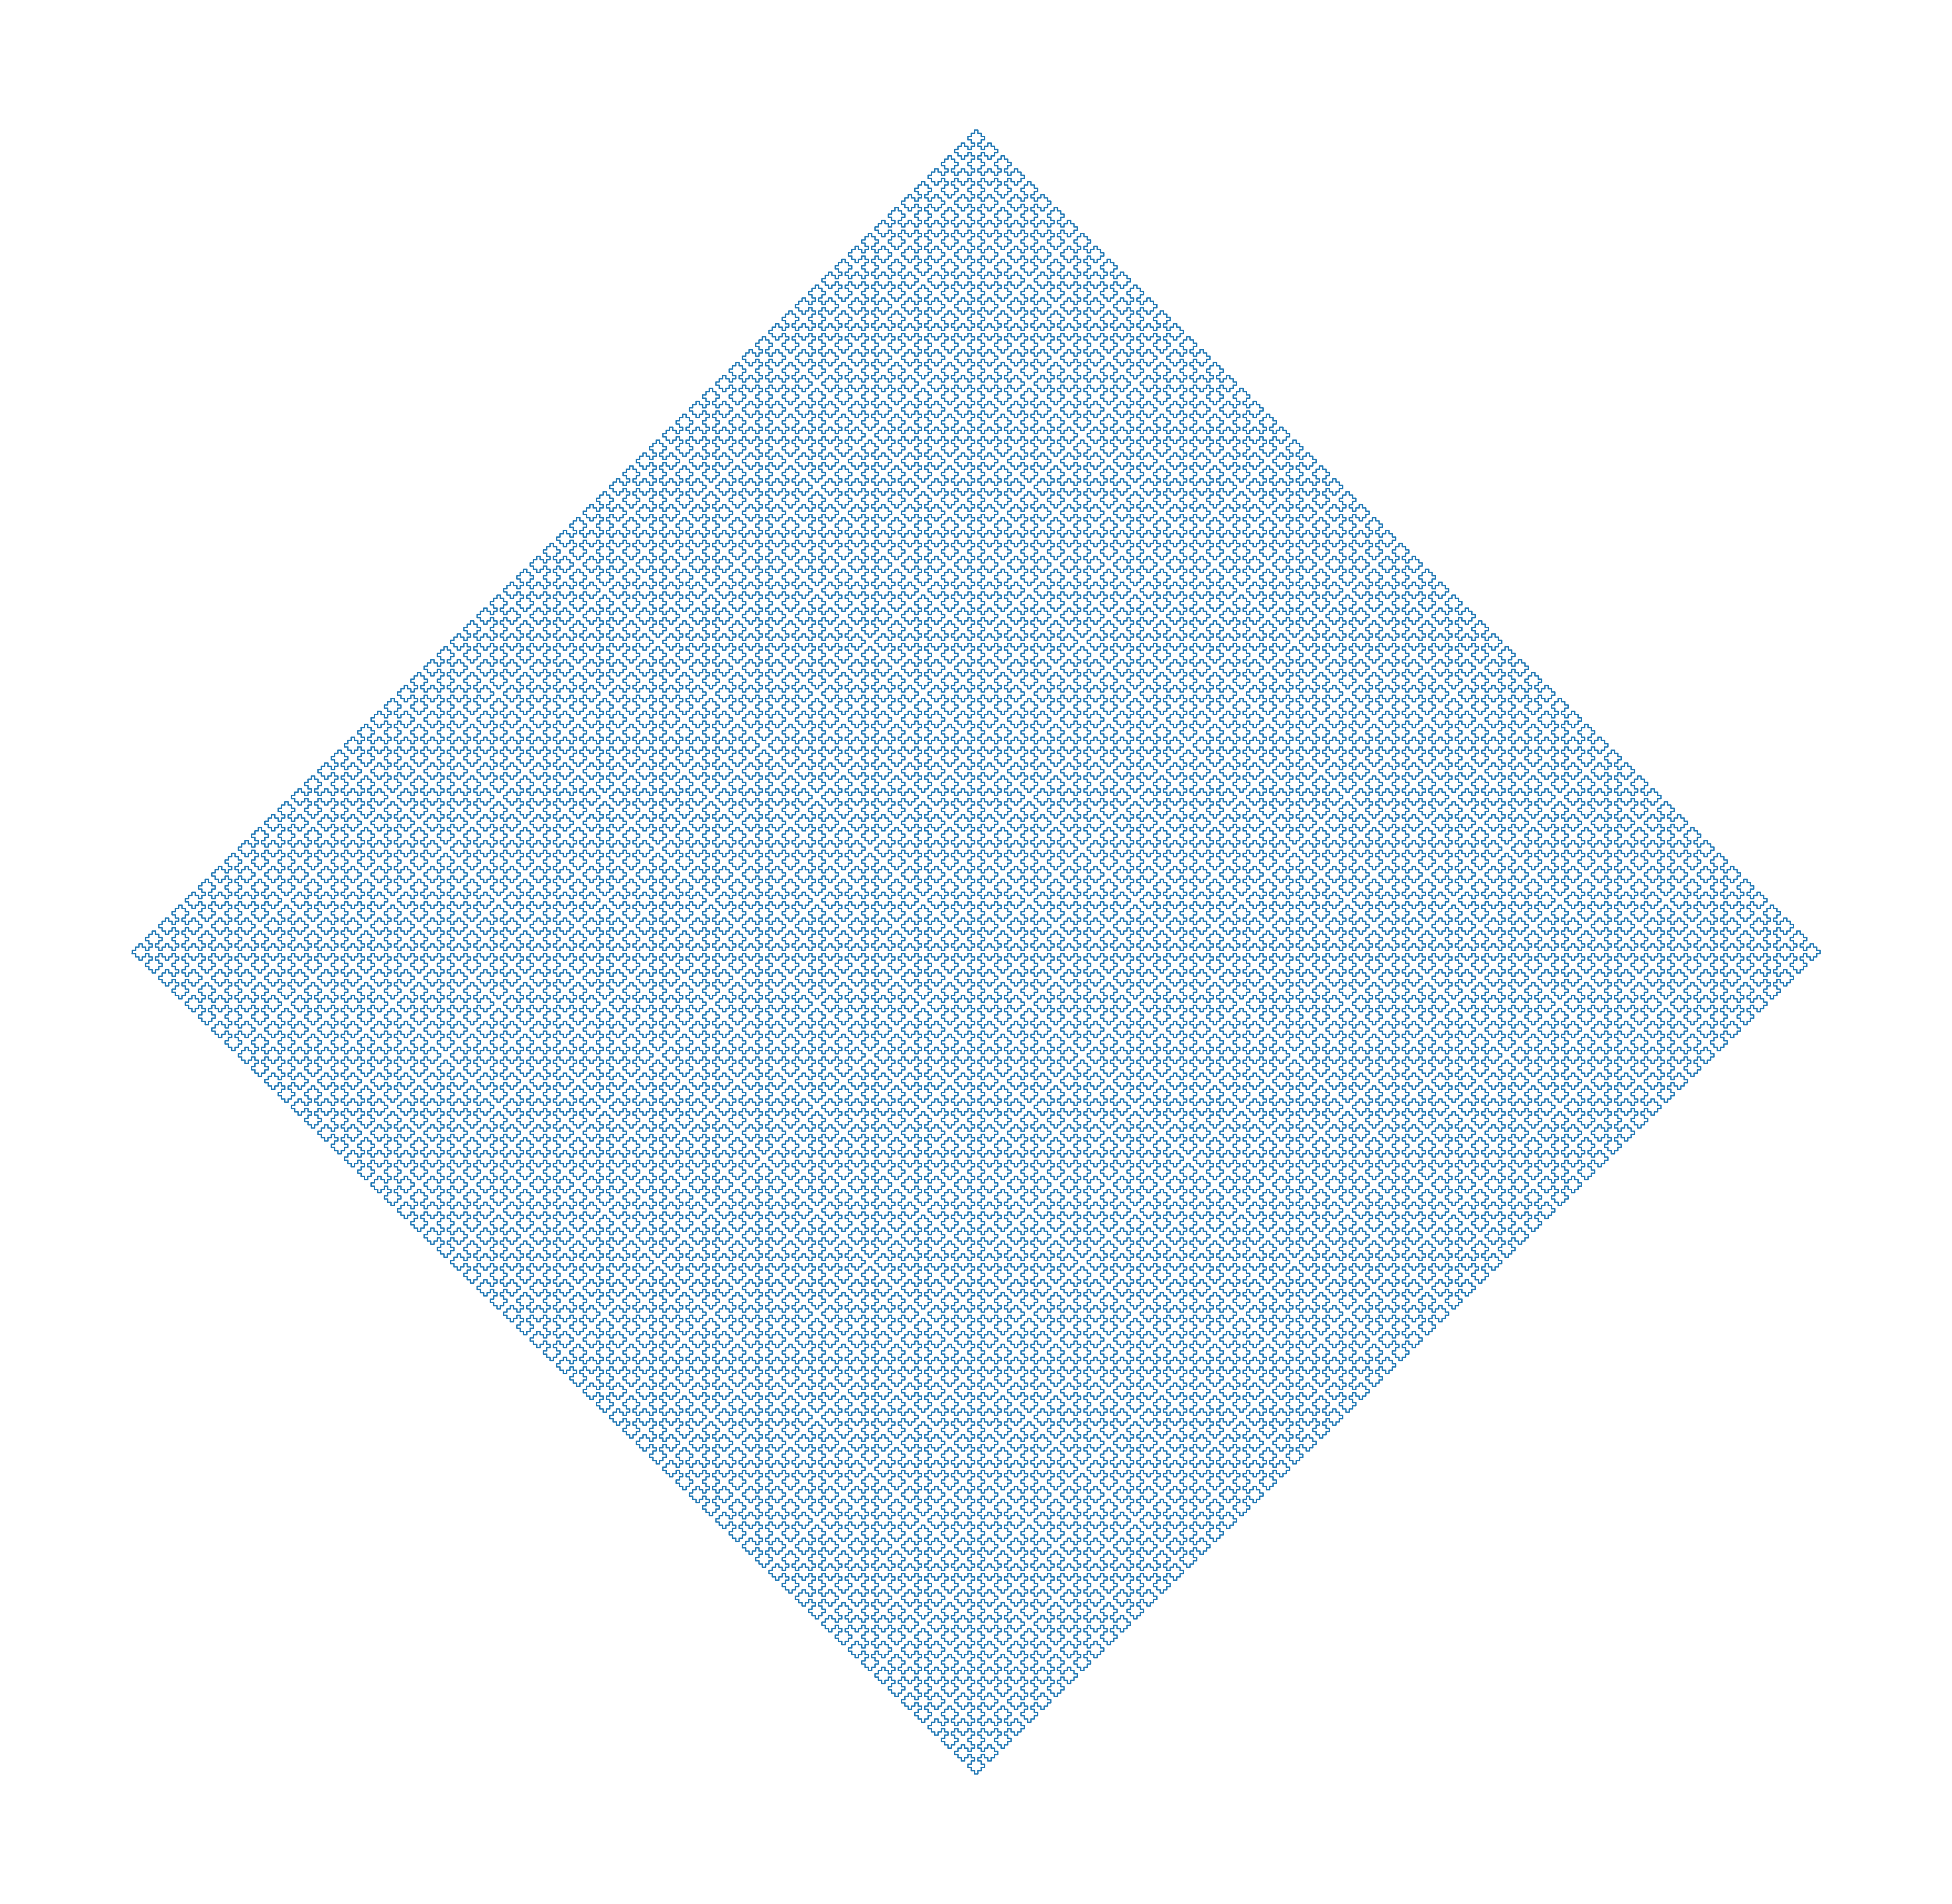

In [7]:
name = "another_sierpinski_curve.png"
x,y = plotting_points(points)

plt.figure(figsize=(5,5), dpi=1200)
plt.axis("off")
plt.plot(x, y, linewidth=0.2)
plt.savefig("../images/"+name, bbox_inches='tight')